In [1]:
!pip install pandas matplotlib seaborn plotly


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px  # Optional, for interactive visualizations

In [3]:
# Convert period_begin to datetime and extract the year
data['period_begin'] = pd.to_datetime(data['period_begin'])
data['year'] = data['period_begin'].dt.year

# Group by city and year, and calculate the median sale price for each group
grouped_price = data.groupby(['city', 'year'])['median_sale_price'].median().reset_index()

# Calculate price growth as percentage change
grouped_price['price_growth'] = grouped_price.groupby('city')['median_sale_price'].pct_change() * 100

# Show the grouped data with price growth
import ace_tools as tools; tools.display_dataframe_to_user(name="City Price Growth", dataframe=grouped_price)
grouped_price.head()

NameError: name 'data' is not defined

In [4]:
# Update the file path to the correct location
file_path = '/Users/janlelie/Desktop/backupDBCorpDafi/five_years_data.csv'

# Reload the CSV data
data = pd.read_csv(file_path)

# Convert period_begin to datetime and extract the year
data['period_begin'] = pd.to_datetime(data['period_begin'])
data['year'] = data['period_begin'].dt.year

# Group by city and year, and calculate the median sale price for each group
grouped_price = data.groupby(['city', 'year'])['median_sale_price'].median().reset_index()

# Calculate price growth as percentage change
grouped_price['price_growth'] = grouped_price.groupby('city')['median_sale_price'].pct_change() * 100

# Show the grouped data with price growth
import ace_tools as tools; tools.display_dataframe_to_user(name="City Price Growth", dataframe=grouped_price)
grouped_price.head()

ModuleNotFoundError: No module named 'ace_tools'

In [5]:
# Show the grouped data with price growth using Pandas' display function
grouped_price.head()


,city,year,median_sale_price,price_growth
0,Abbs Valley,2021,83700.0,NaN
1,Abbs Valley,2022,156000.0,86.379928
2,Abbs Valley,2023,60500.0,-61.217949
3,Abbs Valley,2024,25000.0,-58.677686
4,Aberdeen,2020,259250.0,NaN


In [6]:
# Group by city and year, and calculate the median of median_dom for each group
grouped_dom = data.groupby(['city', 'year'])['median_dom'].median().reset_index()

# Sort by median_dom (shortest first)
grouped_dom = grouped_dom.sort_values(by='median_dom', ascending=True)

# Show the grouped data with median_dom
grouped_dom.head()

,city,year,median_dom
2027,Cool,2021,1.0
2544,Dudley,2023,1.0
5937,Middlebrook,2020,1.0
6478,New Summerfield,2023,1.0
7635,Reklaw,2023,1.0


/var/folders/p5/6y1_0w9s2113vwqqf0vz8xkr0000gn/T/ipykernel_90759/1109015561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_price, x='price_growth', y='city', palette='viridis')


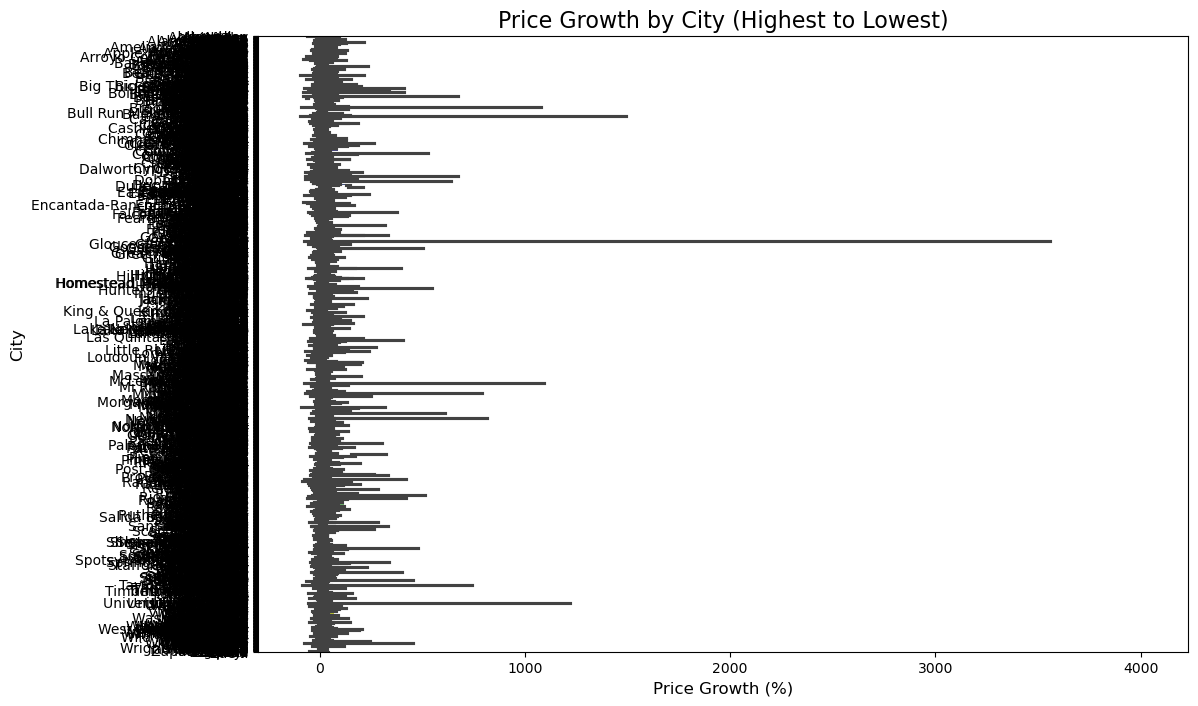

In [7]:
# Plotting the price growth by city
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_price, x='price_growth', y='city', palette='viridis')

# Add labels and title
plt.title('Price Growth by City (Highest to Lowest)', fontsize=16)
plt.xlabel('Price Growth (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.show()

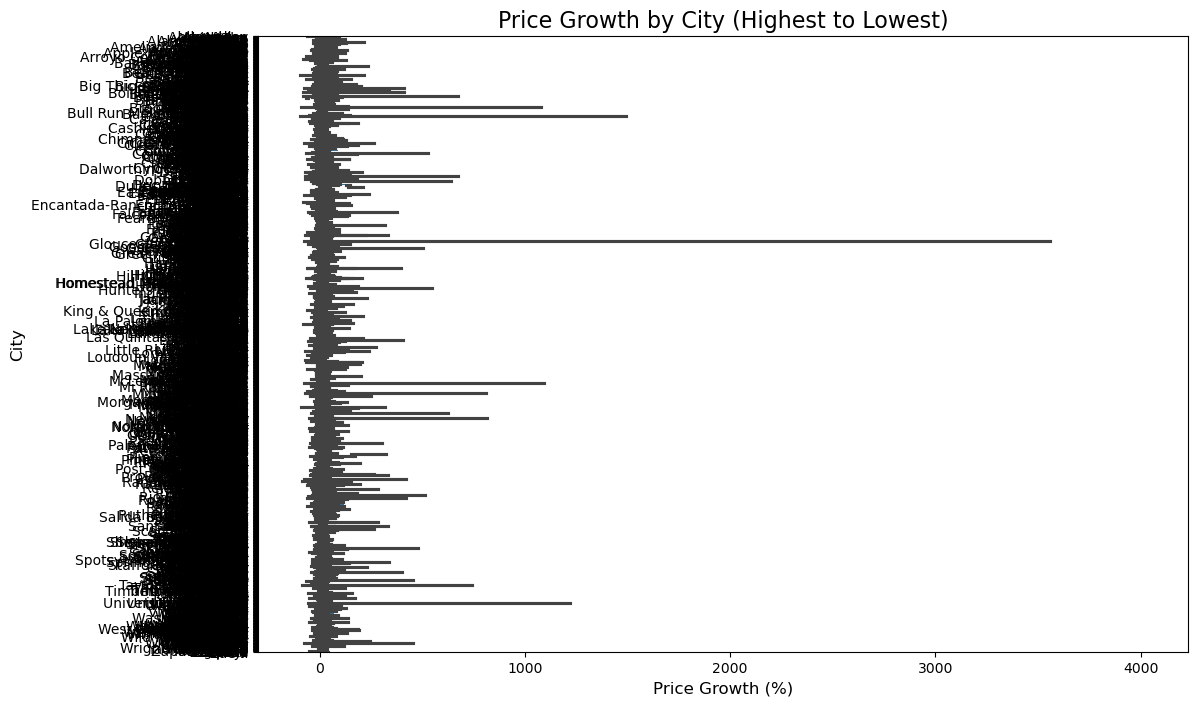

In [8]:
# Plotting the price growth by city
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_price, x='price_growth', y='city')

# Add labels and title
plt.title('Price Growth by City (Highest to Lowest)', fontsize=16)
plt.xlabel('Price Growth (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.show()

In [9]:
# Sort cities by price growth (highest first) and display top cities
top_cities_growth = grouped_price.sort_values(by='price_growth', ascending=False)

# Show the top 10 cities with the highest price growth
top_cities_growth.head(10)[['city', 'price_growth']]

,city,price_growth
6729,Old Hundred,4025.000000
3487,Glen Wilton,3558.333333
9567,Utopia,1632.851986
1375,Butterfield,1492.857143
1377,Butterfield,1114.285714
5884,Megargel,1094.117647
6035,Mingus,1077.884615
1220,Brookston,1077.514793
8433,Seven Springs,986.956522
2408,Devers,917.647059


In [10]:
# Extract the first and last year for each city
first_year_price = grouped_price.groupby('city').first().reset_index()
last_year_price = grouped_price.groupby('city').last().reset_index()

# Merge the first and last year data to compare prices
price_comparison = pd.merge(first_year_price, last_year_price, on='city', suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison['price_difference'] = price_comparison['median_sale_price_end'] - price_comparison['median_sale_price_start']
price_comparison['price_change_percentage'] = (price_comparison['price_difference'] / price_comparison['median_sale_price_start']) * 100

# Show the comparison
price_comparison[['city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

,city,median_sale_price_start,median_sale_price_end,price_difference,price_change_percentage
0,Abbs Valley,83700.0,25000.0,-58700.0,-70.131422
1,Aberdeen,259250.0,390925.0,131675.0,50.790743
2,Abernathy,150000.0,172500.0,22500.0,15.000000
3,Abilene,175000.0,234900.0,59900.0,34.228571
4,Abingdon,162250.0,280000.0,117750.0,72.573190
5,Abram,54000.0,54000.0,0.0,0.000000
6,Addison,384000.0,558250.0,174250.0,45.377604
7,Adrian,42245.0,77300.0,35055.0,82.980234
8,Advance,261000.0,383000.0,122000.0,46.743295
9,Afton,342000.0,691000.0,349000.0,102.046784


In [11]:
# Round the price change percentage to 1 decimal place
price_comparison['price_change_percentage'] = price_comparison['price_change_percentage'].round(1)

# Format the price change percentage as a string with "%" symbol
price_comparison['price_change_percentage'] = price_comparison['price_change_percentage'].astype(str) + '%'

# Show the updated comparison with the rounded price change percentage
price_comparison[['city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

,city,median_sale_price_start,median_sale_price_end,price_difference,price_change_percentage
0,Abbs Valley,83700.0,25000.0,-58700.0,-70.1%
1,Aberdeen,259250.0,390925.0,131675.0,50.8%
2,Abernathy,150000.0,172500.0,22500.0,15.0%
3,Abilene,175000.0,234900.0,59900.0,34.2%
4,Abingdon,162250.0,280000.0,117750.0,72.6%
5,Abram,54000.0,54000.0,0.0,0.0%
6,Addison,384000.0,558250.0,174250.0,45.4%
7,Adrian,42245.0,77300.0,35055.0,83.0%
8,Advance,261000.0,383000.0,122000.0,46.7%
9,Afton,342000.0,691000.0,349000.0,102.0%


In [12]:
# Group by state and city, and calculate the first and last year prices for each group
first_year_price_state = data.groupby(['state', 'city']).first().reset_index()
last_year_price_state = data.groupby(['state', 'city']).last().reset_index()

# Merge the first and last year data to compare prices, including state
price_comparison_state = pd.merge(first_year_price_state, last_year_price_state, on=['state', 'city'], suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Show the comparison by state and city
price_comparison_state[['state', 'city', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']].head(10)

,state,city,median_sale_price_start,median_sale_price_end,price_difference,price_change_percentage
0,North Carolina,Aberdeen,382450.0,278000.0,-104450.0,-27.3%
1,North Carolina,Advance,630000.0,170000.0,-460000.0,-73.0%
2,North Carolina,Alamance,170000.0,540000.0,370000.0,217.6%
3,North Carolina,Albemarle,269000.0,141500.0,-127500.0,-47.4%
4,North Carolina,Alexis,270000.0,180000.0,-90000.0,-33.3%
5,North Carolina,Alliance,79000.0,150000.0,71000.0,89.9%
6,North Carolina,Altamahaw,165000.0,92150.0,-72850.0,-44.2%
7,North Carolina,Anderson Creek,282750.0,220000.0,-62750.0,-22.2%
8,North Carolina,Angier,349706.0,275000.0,-74706.0,-21.4%
9,North Carolina,Ansonville,158000.0,140000.0,-18000.0,-11.4%


In [13]:
# Group by state and calculate the median of the median sale prices for each state
state_median_prices = data.groupby('state')['median_sale_price'].median().reset_index()

# We need the first and last year prices for each state
first_year_price_state = data.groupby('state').first().reset_index()
last_year_price_state = data.groupby('state').last().reset_index()

# Merge the first and last year data for states
price_comparison_state = pd.merge(first_year_price_state[['state', 'median_sale_price']], 
                                  last_year_price_state[['state', 'median_sale_price']], 
                                  on='state', 
                                  suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Show the comparison for each state
price_comparison_state[['state', 'median_sale_price_start', 'median_sale_price_end', 'price_difference', 'price_change_percentage']]

,state,median_sale_price_start,median_sale_price_end,price_difference,price_change_percentage
0,North Carolina,400000.0,998750.0,598750.0,149.7%
1,Texas,56000.0,423500.0,367500.0,656.2%
2,Virginia,343500.0,355000.0,11500.0,3.3%


In [14]:
# First, let's calculate the price change percentage for each city, if not done yet
# Group by state and city, and calculate the first and last year prices for each group
first_year_price_state = data.groupby(['state', 'city']).first().reset_index()
last_year_price_state = data.groupby(['state', 'city']).last().reset_index()

# Merge the first and last year data to compare prices, including state and city
price_comparison_state = pd.merge(first_year_price_state, last_year_price_state, on=['state', 'city'], suffixes=('_start', '_end'))

# Calculate the price difference and percentage change
price_comparison_state['price_difference'] = price_comparison_state['median_sale_price_end'] - price_comparison_state['median_sale_price_start']
price_comparison_state['price_change_percentage'] = (price_comparison_state['price_difference'] / price_comparison_state['median_sale_price_start']) * 100

# Round the price change percentage to 1 decimal place and format as a percentage
price_comparison_state['price_change_percentage'] = price_comparison_state['price_change_percentage'].round(1).astype(str) + '%'

# Now, let's get the 5 highest and 5 lowest price changes per state
top_bottom_changes = price_comparison_state.groupby('state').apply(lambda x: pd.concat([x.nlargest(5, 'price_change_percentage'), x.nsmallest(5, 'price_change_percentage')]))

# Show the result
top_bottom_changes[['state', 'city', 'price_change_percentage']]

TypeError: Column 'price_change_percentage' has dtype object, cannot use method 'nlargest' with this dtype

In [15]:
# Sort the data by state and price change percentage
price_comparison_state_sorted = price_comparison_state.sort_values(by=['state', 'price_change_percentage'], ascending=[True, False])

# Get the top 5 highest and 5 lowest price changes for each state
top_bottom_changes = price_comparison_state_sorted.groupby('state').head(5).append(
    price_comparison_state_sorted.groupby('state').tail(5)
)

# Show the results
top_bottom_changes[['state', 'city', 'price_change_percentage']]

AttributeError: 'DataFrame' object has no attribute 'append'

In [16]:
# Sort the data by state and price change percentage (highest first)
price_comparison_state_sorted = price_comparison_state.sort_values(by=['state', 'price_change_percentage'], ascending=[True, False])

# Get the top 5 cities with the highest price growth for each state
highest_growth = price_comparison_state_sorted.groupby('state').head(5)

# Get the top 5 cities with the lowest price growth for each state
lowest_growth = price_comparison_state_sorted.groupby('state').tail(5)

# Display the results for both
import ace_tools as tools; tools.display_dataframe_to_user(name="Highest Price Growth", dataframe=highest_growth)
tools.display_dataframe_to_user(name="Lowest Price Growth", dataframe=lowest_growth)

# Return them as well for further inspection
highest_growth[['state', 'city', 'price_change_percentage']], lowest_growth[['state', 'city', 'price_change_percentage']]


ModuleNotFoundError: No module named 'ace_tools'

In [17]:
# Display the results for both as separate dataframes
highest_growth[['state', 'city', 'price_change_percentage']], lowest_growth[['state', 'city', 'price_change_percentage']]

(               state           city price_change_percentage
 326   North Carolina     Lincolnton                   99.6%
 614   North Carolina  Wesley Chapel                   98.6%
 463   North Carolina      Red Cross                   97.2%
 598   North Carolina    Walnut Cove                   94.4%
 231   North Carolina  Granite Falls                   93.0%
 768            Texas     Briarcliff                   98.5%
 716            Texas       Beaumont                   98.3%
 1491           Texas  Port O'Connor                   97.7%
 1299           Texas         Marlin                   97.3%
 1260           Texas       Lockhart                   97.1%
 2000        Virginia     Eagle Rock                  990.9%
 2066        Virginia        Hiltons                   97.7%
 2302        Virginia     Union Mill                   97.5%
 2332        Virginia       Woodburn                   92.4%
 2232        Virginia        Rivanna                    9.7%,
                state  

In [18]:
# Check consistency of the top 5 highest growth cities from both outputs
print("Top 5 Highest Price Growth from earlier snippet:")
print(highest_growth[['state', 'city', 'price_change_percentage']].head(5))

print("\nTop 5 Highest Price Growth from latest snippet:")
print(price_comparison_state_sorted.groupby('state').head(5)[['state', 'city', 'price_change_percentage']])

# Similarly, for the lowest
print("\nTop 5 Lowest Price Growth from earlier snippet:")
print(lowest_growth[['state', 'city', 'price_change_percentage']].head(5))

print("\nTop 5 Lowest Price Growth from latest snippet:")
print(price_comparison_state_sorted.groupby('state').tail(5)[['state', 'city', 'price_change_percentage']])

Top 5 Highest Price Growth from earlier snippet:
              state           city price_change_percentage
326  North Carolina     Lincolnton                   99.6%
614  North Carolina  Wesley Chapel                   98.6%
463  North Carolina      Red Cross                   97.2%
598  North Carolina    Walnut Cove                   94.4%
231  North Carolina  Granite Falls                   93.0%

Top 5 Highest Price Growth from latest snippet:
               state           city price_change_percentage
326   North Carolina     Lincolnton                   99.6%
614   North Carolina  Wesley Chapel                   98.6%
463   North Carolina      Red Cross                   97.2%
598   North Carolina    Walnut Cove                   94.4%
231   North Carolina  Granite Falls                   93.0%
768            Texas     Briarcliff                   98.5%
716            Texas       Beaumont                   98.3%
1491           Texas  Port O'Connor                   97.7%
1299    

In [19]:
# Group by city and calculate the median of median_dom for each city
grouped_dom = data.groupby(['city', 'state'])['median_dom'].median().reset_index()

# Sort by median_dom to find the shortest and longest days on market
shortest_dom = grouped_dom.sort_values(by='median_dom', ascending=True)  # shortest first
longest_dom = grouped_dom.sort_values(by='median_dom', ascending=False)  # longest first

# Show the top 5 cities with shortest and longest median DOM
shortest_dom.head(5), longest_dom.head(5)

(             city           state  median_dom
 1846  San Perlita           Texas         1.0
 713    Fort Bliss           Texas         3.0
 1690       Raemon  North Carolina         3.0
 711        Forsan           Texas         3.0
 5           Abram           Texas         4.0,
                     city     state  median_dom
 780             Glen Lyn  Virginia      1944.0
 1829      Salineño North     Texas       458.0
 826   Green Valley Farms     Texas       443.0
 1077           La Minita     Texas       432.0
 1707            Realitos     Texas       420.5)

In [20]:
# Group by state and calculate the median of median_dom for each state
state_median_dom = data.groupby('state')['median_dom'].median().reset_index()

# Sort by median_dom to identify fastest and slowest markets by state
state_median_dom_sorted = state_median_dom.sort_values(by='median_dom', ascending=True)  # shortest first

# Show the sorted states with the median DOM
state_median_dom_sorted.head(10)

,state,median_dom
2,Virginia,28.0
1,Texas,44.0
0,North Carolina,46.0


/var/folders/p5/6y1_0w9s2113vwqqf0vz8xkr0000gn/T/ipykernel_90759/1334101296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='median_dom', data=state_median_dom_sorted, palette='coolwarm')


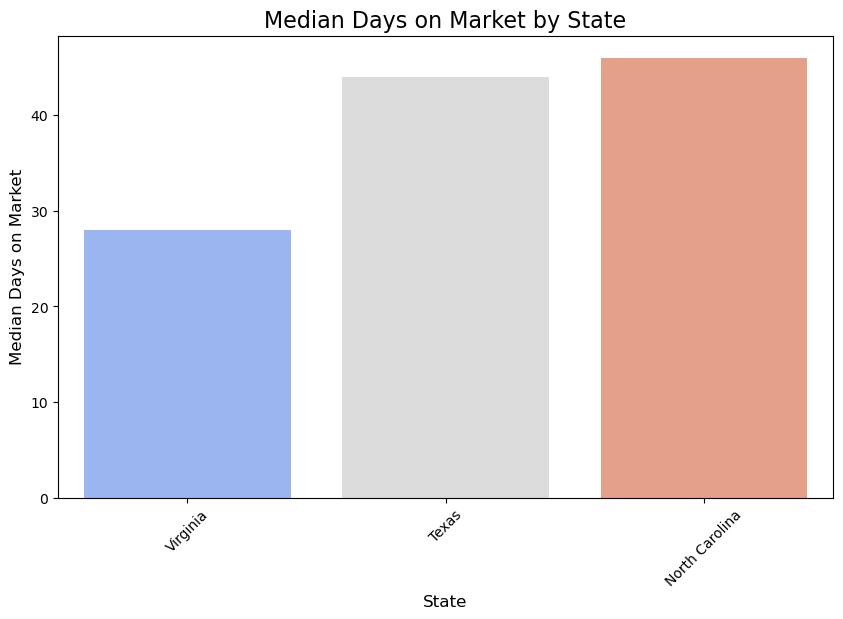

In [21]:
# Plotting the median DOM by state as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='median_dom', data=state_median_dom_sorted, palette='coolwarm')

# Add labels and title
plt.title('Median Days on Market by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


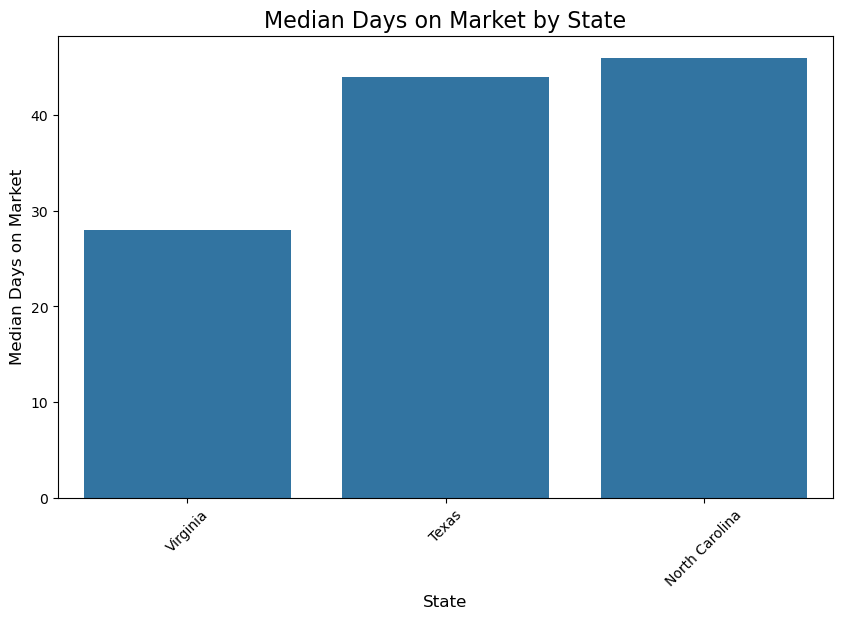

In [22]:
# Plotting the median DOM by state as a bar chart without using palette
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='median_dom', data=state_median_dom_sorted)

# Add labels and title
plt.title('Median Days on Market by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

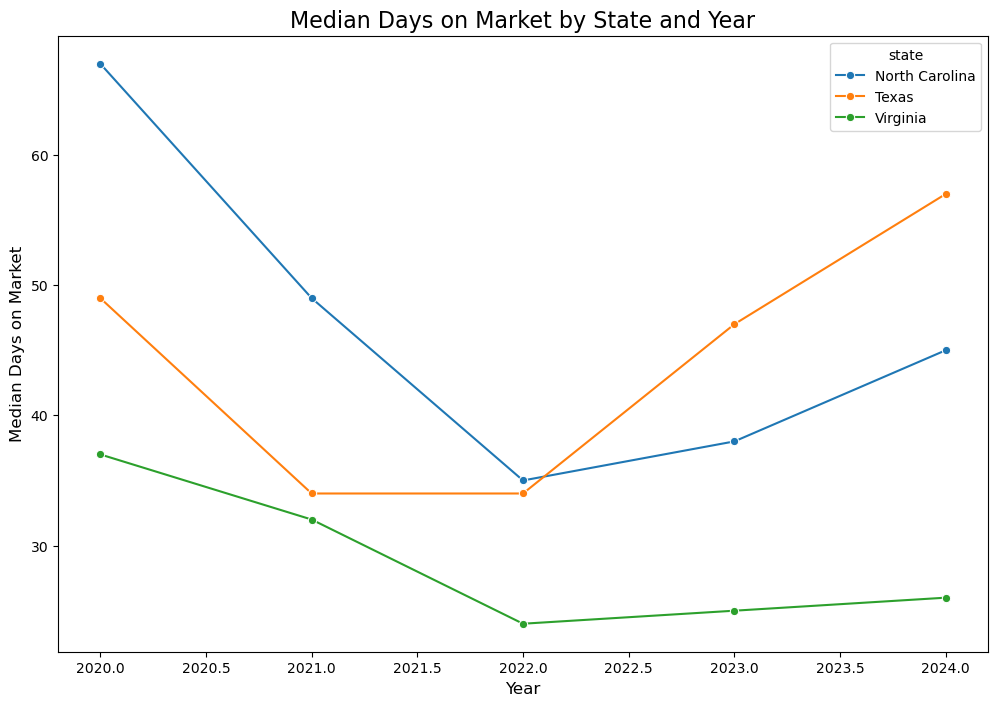

In [23]:
# Group by state and year to calculate the median of median_dom for each state per year
data['year'] = data['period_begin'].dt.year  # Extract the year from period_begin

state_year_median_dom = data.groupby(['state', 'year'])['median_dom'].median().reset_index()

# Plotting the median DOM by state and year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')

# Add labels and title
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Show the plot
plt.show()

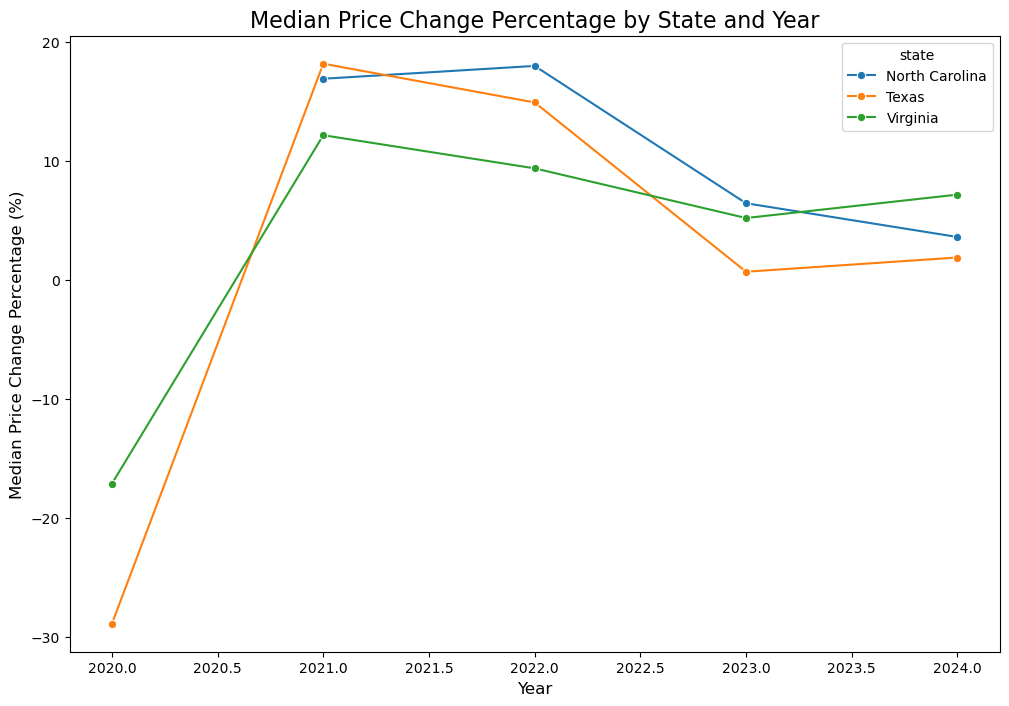

In [24]:
# Group by state and year to calculate the median of price_change_percentage for each state per year
data['year'] = data['period_begin'].dt.year  # Extract the year from period_begin

# Calculate price growth for each city and year
grouped_price = data.groupby(['city', 'state', 'year'])['median_sale_price'].median().reset_index()
grouped_price['price_growth'] = grouped_price.groupby('city')['median_sale_price'].pct_change() * 100

# Now group by state and year to calculate the median price change percentage for each state per year
state_year_price_growth = grouped_price.groupby(['state', 'year'])['price_growth'].median().reset_index()

# Plotting the median price growth by state and year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')

# Add labels and title
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Show the plot
plt.show()

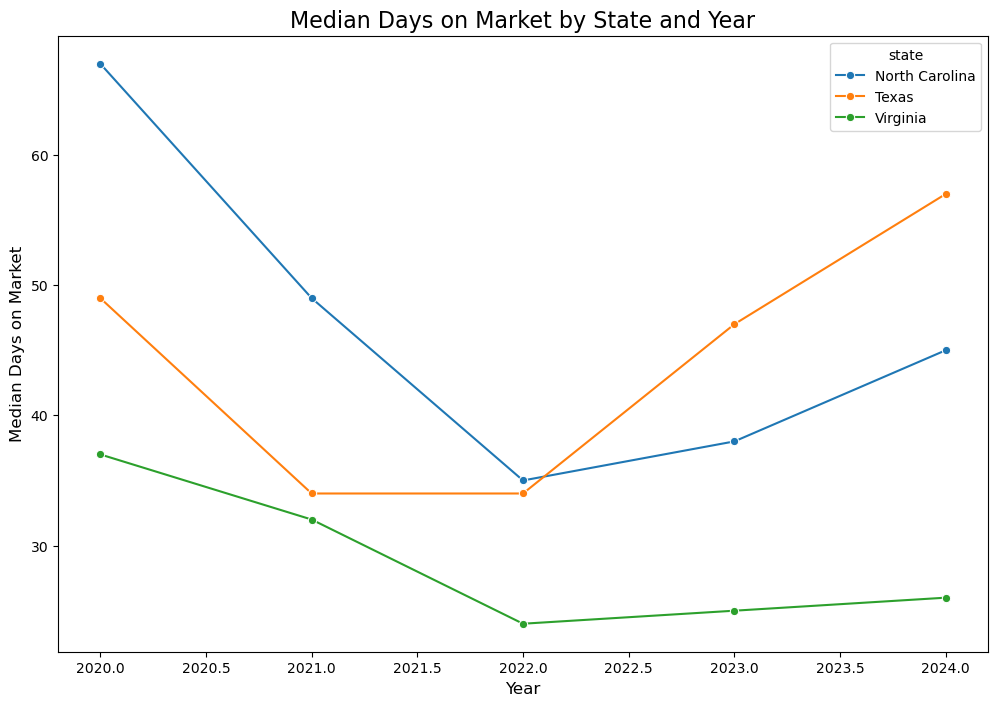

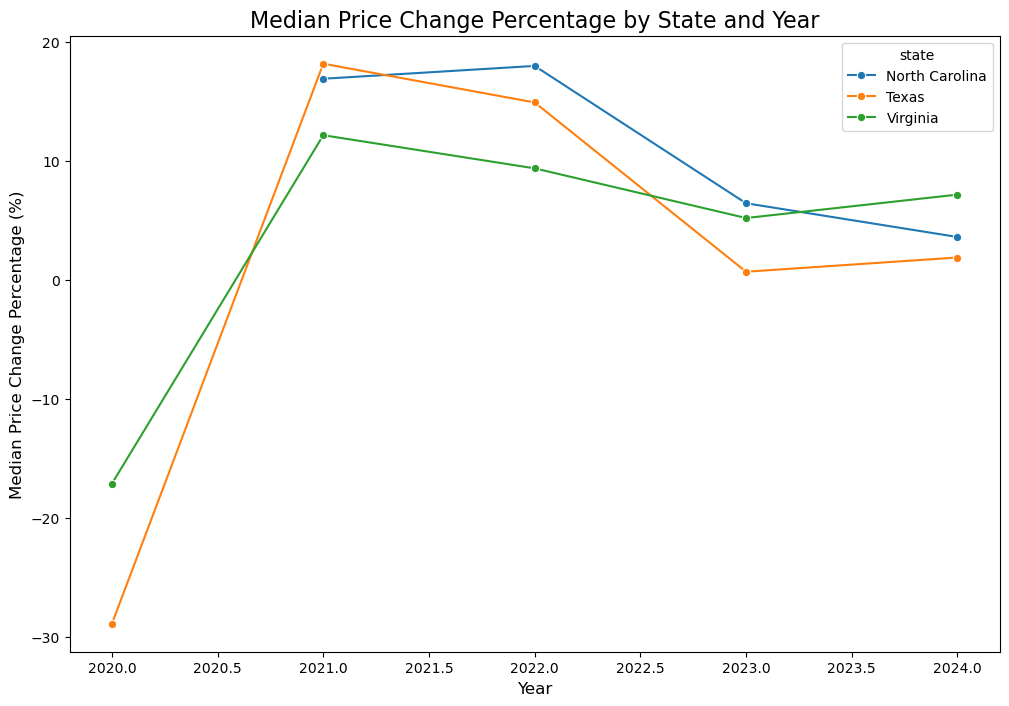

In [25]:
# Median DOM by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Save the plot as a PNG file
plt.savefig('median_dom_by_state_and_year.png', dpi=300)

# Price Change Percentage by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Save the plot as a PNG file
plt.savefig('price_change_percentage_by_state_and_year.png', dpi=300)

# Show the plots (optional)
plt.show()

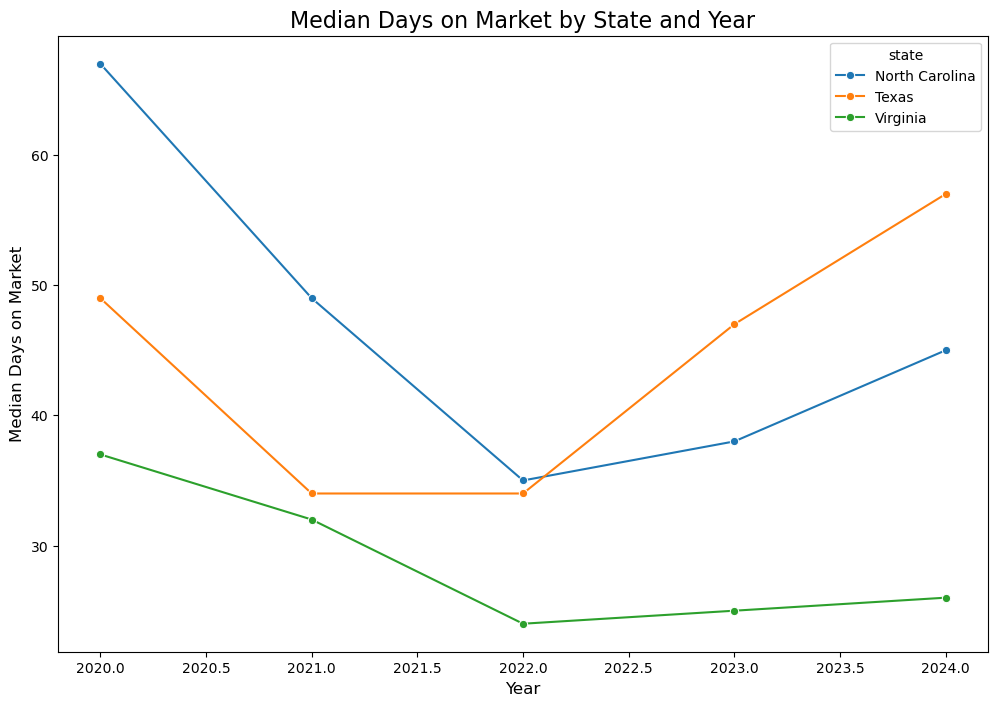

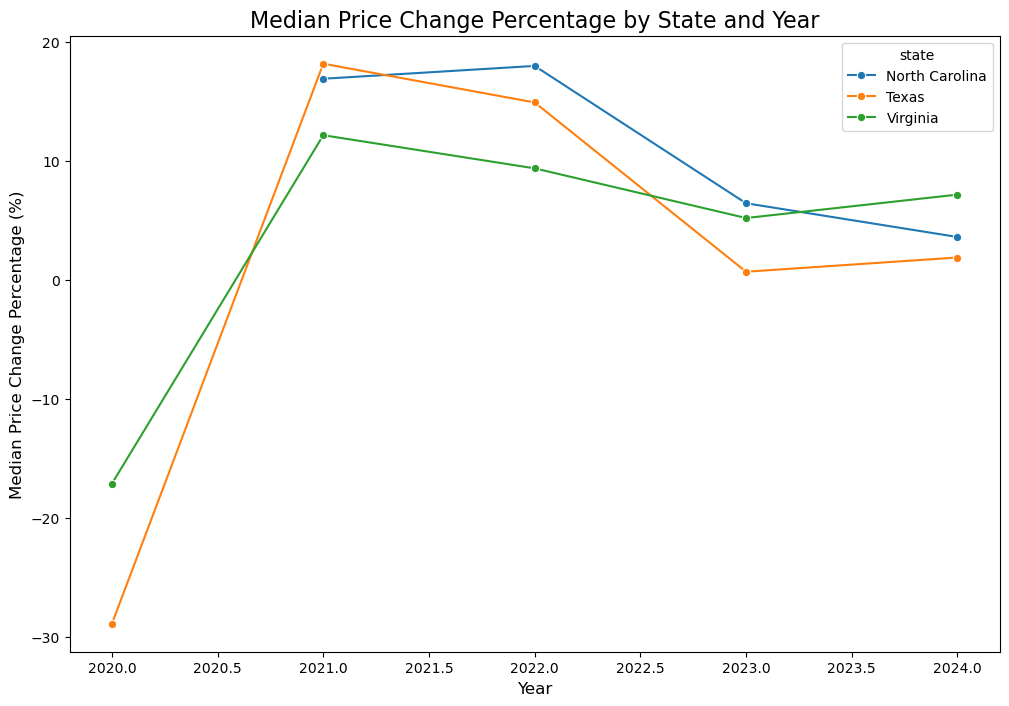

In [26]:
# Median DOM by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='median_dom', hue='state', data=state_year_median_dom, marker='o')
plt.title('Median Days on Market by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Days on Market', fontsize=12)

# Save the plot as a PNG file to Desktop
plt.savefig('/Users/janlelie/Desktop/median_dom_by_state_and_year.png', dpi=300)

# Price Change Percentage by state and year plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_growth', hue='state', data=state_year_price_growth, marker='o')
plt.title('Median Price Change Percentage by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price Change Percentage (%)', fontsize=12)

# Save the plot as a PNG file to Desktop
plt.savefig('/Users/janlelie/Desktop/price_change_percentage_by_state_and_year.png', dpi=300)

# Show the plots (optional)
plt.show()